### Task # 01 , Week 2

Task # 1.1: Implement a linear regression model to predict housing prices based on a given dataset.
Expected Output:

- Load a dataset the Boston Housing dataset.
- Train a linear regression model.
- Print the model's coefficients and intercept.
- Predict housing prices on a test set and print the mean squared error.
- Visualize the regression line and data points.

In [2]:
#importing reguired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
#importing dataset as dataframe
file_path = 'HousingData.csv'
df = pd.read_csv(file_path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
#now we have data loaded lets apply some pre processing steps
#replacing '?' with nan
df.replace('?',np.nan,inplace = True)

#lets see if there are any missing values
missing_data = df.isnull()
for column in list(missing_data.columns.values):
    print(f"column name = {column}")
    print(missing_data[column].value_counts())

print("loop ended")

column name = CRIM
CRIM
False    486
True      20
Name: count, dtype: int64
column name = ZN
ZN
False    486
True      20
Name: count, dtype: int64
column name = INDUS
INDUS
False    486
True      20
Name: count, dtype: int64
column name = CHAS
CHAS
False    486
True      20
Name: count, dtype: int64
column name = NOX
NOX
False    506
Name: count, dtype: int64
column name = RM
RM
False    506
Name: count, dtype: int64
column name = AGE
AGE
False    486
True      20
Name: count, dtype: int64
column name = DIS
DIS
False    506
Name: count, dtype: int64
column name = RAD
RAD
False    506
Name: count, dtype: int64
column name = TAX
TAX
False    506
Name: count, dtype: int64
column name = PTRATIO
PTRATIO
False    506
Name: count, dtype: int64
column name = B
B
False    506
Name: count, dtype: int64
column name = LSTAT
LSTAT
False    486
True      20
Name: count, dtype: int64
column name = MEDV
MEDV
False    506
Name: count, dtype: int64
loop ended


In [13]:
# List of column names to process
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Iterate through the list of columns
for column in columns:
    # Calculate the average value for the current column
    average_value = df[column].astype('float').mean(axis=0)
    
    # Replace NaN values with the average value
    df[column] = df[column].replace(np.nan, average_value)

# Check if there are any remaining NaN values in each column
isnull_counts = df[columns].isnull().sum()
print(isnull_counts)


CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64


In [14]:
#verification
missing_data = df.isnull()
for column in list(missing_data.columns.values):
    print(f"column name = {column}")
    print(missing_data[column].value_counts())

print("loop ended")

column name = CRIM
CRIM
False    506
Name: count, dtype: int64
column name = ZN
ZN
False    506
Name: count, dtype: int64
column name = INDUS
INDUS
False    506
Name: count, dtype: int64
column name = CHAS
CHAS
False    506
Name: count, dtype: int64
column name = NOX
NOX
False    506
Name: count, dtype: int64
column name = RM
RM
False    506
Name: count, dtype: int64
column name = AGE
AGE
False    506
Name: count, dtype: int64
column name = DIS
DIS
False    506
Name: count, dtype: int64
column name = RAD
RAD
False    506
Name: count, dtype: int64
column name = TAX
TAX
False    506
Name: count, dtype: int64
column name = PTRATIO
PTRATIO
False    506
Name: count, dtype: int64
column name = B
B
False    506
Name: count, dtype: int64
column name = LSTAT
LSTAT
False    506
Name: count, dtype: int64
column name = MEDV
MEDV
False    506
Name: count, dtype: int64
loop ended


In [19]:
#lets check if the the data types are correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### the meaning of each attribute
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town

- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

#### Correlation
- Correlation helps in understanding how changes in one variable may affect another(for linear), but it does not imply causation or capture non-linear relationships.
- A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the table represents the correlation between two variables

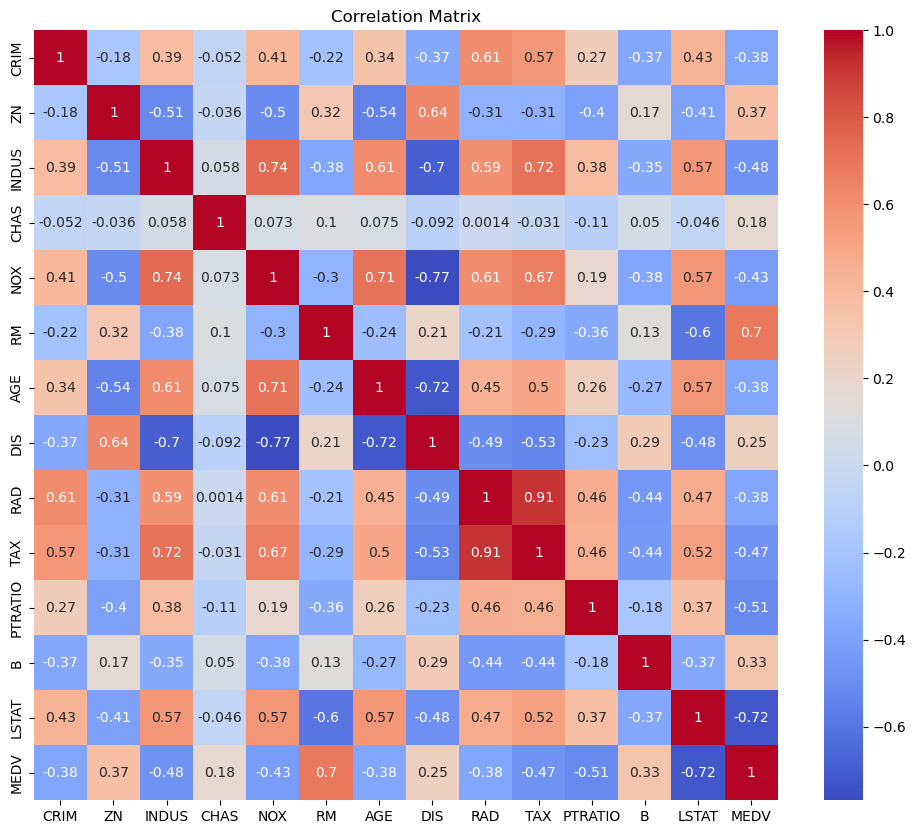

In [29]:
#finding a correlation matrix and visualising it with heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
#NOW
# Defining features (X) and target (y)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

# Splitting the dataset into training and testing sets
#test_size = 0.2 means 20% data will be used for testing purpose
#The random_state parameter is used to control the randomness of the data split. This ensures that you get the same 
#train-test split every time you run the code, which is important for reproducibility. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]
Intercept: 27.91246520103061


In [34]:
# Predict housing prices on the test set
y_pred = model.predict(X_test)

In [35]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 25.017672023842806


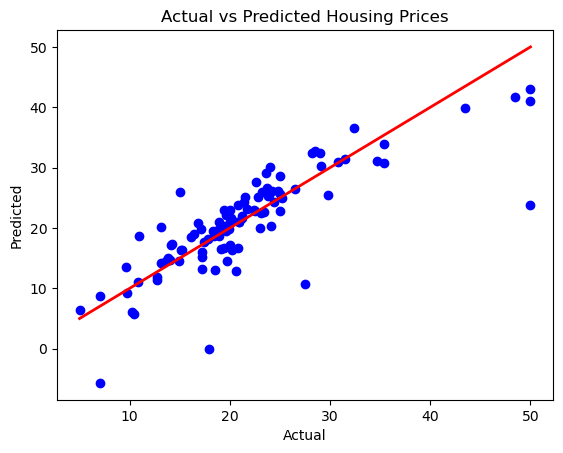

In [36]:
# Visualize the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

Task # 1.2: Build a decision tree classifier to classify iris flower species.
Expected Output:
- Load the Iris dataset.
- Train a decision tree classifier.
- Print the classification report and confusion matrix.
- Visualize the decision tree.

In [29]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [30]:
#Loading DataSet
# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#replacing ? with NaN if there is any
df.replace('?',np.nan,inplace = True)
#checking if there are any null or missing values
missing_data = df_iris.isnull()
for column in list(missing_data.columns.values):
    print(f"column name = {column}")
    print(missing_data[column].value_counts())

print("loop ended")

column name = sepal length (cm)
sepal length (cm)
False    150
Name: count, dtype: int64
column name = sepal width (cm)
sepal width (cm)
False    150
Name: count, dtype: int64
column name = petal length (cm)
petal length (cm)
False    150
Name: count, dtype: int64
column name = petal width (cm)
petal width (cm)
False    150
Name: count, dtype: int64
column name = Species
Species
False    150
Name: count, dtype: int64
loop ended


In [32]:
#splitting the data for train and test purpose
# Splitting the data into train and test sets
# X contains all features except the target variable "Species"
X = df_iris.drop("Species",axis=1)
# y contains the target variable "Species"
y = df_iris["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 42)

In [33]:
# Step c: Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
#prediction
y_pred = clf.predict(X_test)
#confusion Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
#confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


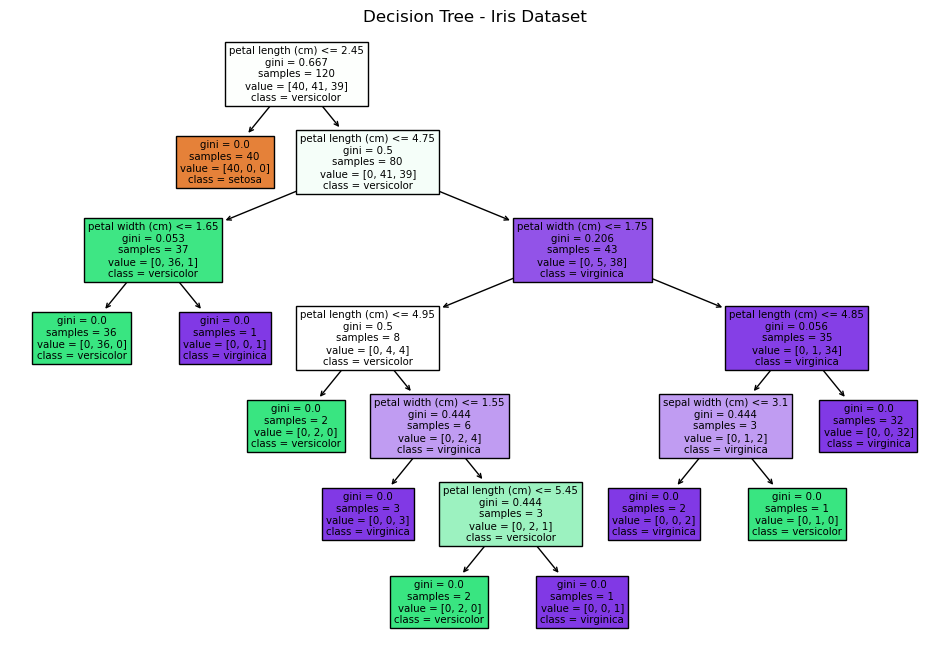

In [36]:
#Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree - Iris Dataset")
plt.show()